Ayanda Thwala (2434602) <br>
Nqobile Hlatshwayo (2438280) <br>
Thapelo Duma (2493083)

# Sign-Language-Digits Classifier

Processor (CPU) :	11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz   2.42 GHz

RAM :	8.00 GB (7.70 GB usable)

System type :	64-bit operating system, x64-based processor

Graphics (GPU) - Intel(R) Iris(R) Xe Graphics

## Import Libraries 

In [28]:
import os 
import time
import random
import numpy as np    
from PIL import Image  
import matplotlib.pyplot as plt       
import torch                            
import torch.nn as nn               
import torch.optim as optim             
import torch.nn.functional as F                                      
import torchvision.transforms as transforms    
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay                 
import warnings                                           
warnings.filterwarnings('ignore')  

In [29]:
# Set random seed
torch.backends.cudnn.deterministic = True       # Set random number generator in cudnn framework to deterministic mode
torch.backends.cudnn.benchmark = False          # Turn off the function of automatically finding the optimal convolution algorithm of the CuDNN framework to avoid the impact of different algorithms on the results.
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

## Import data from dataset

In [30]:
def getPhoto(path_photo):
    files_list = os.listdir(path_photo) 
    return files_list

In [31]:
train_data=[]
train_label=[]

# The number on the hand is i
for i in range(10):
    path='./Sign-Language-Digits-Dataset/train/A'+str(i)+"/"
    list=getPhoto(path)
    
    for j in range(len(list)):
        full_path=path+list[j]
        train_data.append(full_path)
        train_label.append(i)
        
train_data=np.array(train_data)
train_label=np.array(train_label)

In [32]:
np.sum(train_label==0),np.sum(train_label==1),np.sum(train_label==2),np.sum(train_label==3),np.sum(train_label==4),np.sum(train_label==5),np.sum(train_label==6),np.sum(train_label==7),np.sum(train_label==8),np.sum(train_label==9)

(170, 171, 171, 171, 172, 172, 172, 171, 173, 169)

In [33]:
vali_data=[]
vali_label=[]

# The number on the hand is i
for i in range(10):
    path='./Sign-Language-Digits-Dataset/valid/A'+str(i)+"/"
    list=getPhoto(path)
    
    for j in range(len(list)):
        full_path=path+list[j]
        vali_data.append(full_path)
        vali_label.append(i)
        
vali_data=np.array(vali_data)
vali_label=np.array(vali_label)

In [34]:
np.sum(vali_label==0),np.sum(vali_label==1),np.sum(vali_label==2),np.sum(vali_label==3),np.sum(vali_label==4),np.sum(vali_label==5),np.sum(vali_label==6),np.sum(vali_label==7),np.sum(vali_label==8),np.sum(vali_label==9)

(30, 30, 30, 30, 30, 30, 30, 30, 30, 30)

In [35]:
test_data=[]
test_label=[]

# The number on the hand is i
for i in range(10):
    path='./Sign-Language-Digits-Dataset/test/A'+str(i)+"/"
    list=getPhoto(path)
    
    for j in range(len(list)):
        full_path=path+list[j]
        test_data.append(full_path)
        test_label.append(i)
        
test_data=np.array(test_data)
test_label=np.array(test_label)

In [36]:
np.sum(test_label==0),np.sum(test_label==1),np.sum(test_label==2),np.sum(test_label==3),np.sum(test_label==4),np.sum(test_label==5),np.sum(test_label==6),np.sum(test_label==7),np.sum(test_label==8),np.sum(test_label==9)

(5, 5, 5, 5, 5, 5, 5, 5, 5, 5)

## Transform

In [37]:
# Define the standard of regularization, the mean and variance of the three color channels, which are values ​​derived from the ImageNet data set
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [38]:
# The values ​​of mean and variance are obtained from ImageNet
transform=transforms.Compose([
     transforms.RandomRotation(30), # Randomly rotate an angle within the range of [-30,30]
     transforms.RandomResizedCrop(size=100, scale=(0.8, 1.2),interpolation=transforms.functional.InterpolationMode.BILINEAR),# First, scale the image randomly, and then change the image into a 100*100 image.
     transforms.RandomHorizontalFlip(), # Random horizontal flip
     #transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5), # Random color transformation
     transforms.ToTensor(), # Convert to tensor
     normalize # Standardized operations on images
])

In [40]:
X_train=[]
y_train=[]

for epoch in range(15):
    for i in range(len(train_data)):
        img=Image.open(train_data[i])
        img=np.array(transform(img))
        X_train.append(img)
        y_train.append(train_label[i])
        
    print(epoch)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [ ]:
len(X_train),len(y_train)

(25680, 25680)

In [ ]:
X_vali=[]
y_vali=[]

for epoch in range(15):
    for i in range(len(vali_data)):
        img=Image.open(vali_data[i])
        img=np.array(transform(img))
        X_vali.append(img)
        y_vali.append(vali_label[i])
        
    print(epoch)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [ ]:
len(X_vali),len(y_vali)

(4500, 4500)

In [ ]:
X_test=[]
y_test=[]

for epoch in range(15):
    for i in range(len(test_data)):
        img=Image.open(test_data[i])
        img=np.array(transform(img))
        X_test.append(img)
        y_test.append(test_label[i])
        
    print(epoch)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [ ]:
len(X_test),len(y_test)

(750, 750)

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_vali=np.array(X_vali)
y_vali=np.array(y_vali)
X_test=np.array(X_test)
y_test=np.array(y_test)

## Build Model

In [ ]:
class CNN(nn.Module):

    def __init__(self):
        
        super(CNN,self).__init__()
       
        self.conv=nn.Sequential(
        
        #3*100*100
        nn.Conv2d(3,16,3,1,0,bias=True),
        #32*98*98
        nn.MaxPool2d(2,2,0),
        #32*49*49
        nn.BatchNorm2d(16),
        nn.SiLU(),
        
        nn.Conv2d(16,32,3,1,0,bias=True),
        #32*47*47
        nn.MaxPool2d(2,2,(1,1)),
        nn.BatchNorm2d(32),
        nn.GELU(),
        
        nn.Conv2d(32,64,3,1,0,bias=True),
        nn.MaxPool2d(2,2,0),
        #64*11*11
        nn.BatchNorm2d(64),
        nn.Tanh(),
        
        )
       
        # Fully connected network layer, input 64*30*30, output the probability of 10 categories
        self.Linear=nn.Sequential(
            nn.Linear(64*11*11,1024),
            nn.GELU(),
            nn.BatchNorm1d(1024),
            nn.Linear(1024,124),
            nn.GELU(),
            nn.BatchNorm1d(124),
            nn.Linear(124,10),
        )
      
        
    def forward(self,input): 
        output=input
        output=self.conv(output)
        output=output.view(-1,64*11*11)
        output=self.Linear(output)

        return F.softmax(output,dim=1)

In [ ]:
def weight_init(m):
    # Get the name of the class to which the object belongs
    class_name=m.__class__.__name__
    
    # When "conv" appears in the name of the object, it is a convolution operation
    if class_name.find('conv')!=-1:
        
        # The convolution kernel is randomly initialized according to the mean and standard deviation of the normal distribution. 
        m.weight.data.normal_(0,0.02)

In [ ]:
# Initialize the neural network
netC=CNN()
netC.apply(weight_init)
print(netC)

# optimizer
optimizer=optim.Adam(netC.parameters(),lr=0.0002,betas=(0.5,0.999))

# loss function
# criterion= nn.CrossEntropyLoss() # Negative log-likelihood loss function is also a type of cross-entropy loss function
criterion = nn.MSELoss() # Mean square error loss function

# The training cycle is 10 times
num_epochs=10

# Create Variables To Track Things
train_losses = []
vali_losses = []
train_correct = []
vali_correct = []

CNN(
  (conv): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): SiLU()
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (5): MaxPool2d(kernel_size=2, stride=2, padding=(1, 1), dilation=1, ceil_mode=False)
    (6): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): GELU(approximate='none')
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Tanh()
  )
  (Linear): Sequential(
    (0): Linear(in_features=7744, out_features=1024, bias=True)
    (1): GELU(approximate='none')
    (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_

## Train

In [ ]:
start_time = time.time()

for epoch in range(num_epochs):
    num=[i for i in range(len(X_train))]
    np.random.shuffle(num)
    X_train=X_train[num]
    y_train=y_train[num]
    
    numi=[j for j in range(len(X_vali))]
    np.random.shuffle(numi)
    X_vali=X_vali[numi]
    y_vali=y_vali[numi]
    
    trn_corr = 0
    val_corr = 0
    print("start")
    
    for i in range(10):
        image=[]
        label=[]
        
        for j in range(500):
            image.append(X_train[1000*i+j].reshape((3,100,100)))
            label.append(y_train[1000*i+j])
            
        # Convert data into a tensor format that can be processed
        image=torch.Tensor(image) 
        label=torch.Tensor(label) 
        
        # train
        netC.train()
        
        # Put the data in for training
        output=netC(image)
        
        # Calculate the loss function each time
        label = label.unsqueeze(1)
        error=criterion(output,label)
        
        predicted = torch.max(output.data, 1)[1] # add up the number of corrrect predidctions
        trn_corr += (predicted == label).sum()   # how many correct in the batch
                
        # Backpropagation
        error.backward()
        
        # Optimizer performs optimization (gradient descent, error reduction)
        optimizer.step()
        
        # Clear the gradient
        optimizer.zero_grad()
        
        if i%5==0:
            print(epoch,error.item())
            train_losses.append(error)
    train_correct.append(trn_corr)
    
    # Validate
    print("Validation")
    with torch.no_grad(): # we do not need to backpropagate
        for i in range(10):
            image=[]
            label=[]
        
            for j in range(500):
                image.append(X_vali[100*i+j].reshape((3,100,100)))
                label.append(y_vali[100*i+j])
            
            image=torch.Tensor(image) 
            label=torch.Tensor(label)
            label = label.unsqueeze(1)
            
            y_val = netC(image) # No flatten
            predicted = torch.max(y_val.data,1)[1]
            val_corr += (predicted == label).sum()
            loss = criterion(y_val,label) 
            
            if i%5==0:
                print(epoch,loss.item())      
                vali_losses.append(loss)        
    vali_correct.append(val_corr)
    
current_time = time.time()
total = current_time - start_time
print(f'Training took {total/60} minutes')

start
0 29.634193420410156
0 26.665355682373047
Validation
0 27.059749603271484
0 28.290143966674805
start
1 27.92133140563965
1 27.818113327026367
Validation
1 27.233318328857422
1 26.298114776611328
start
2 28.19010353088379
2 25.695697784423828
Validation
2 27.578903198242188
2 27.266094207763672
start
3 28.762889862060547
3 27.681272506713867
Validation
3 27.413284301757812
3 27.242088317871094
start
4 28.01647186279297
4 27.726062774658203
Validation
4 27.06047248840332
4 27.612472534179688
start
5 28.106061935424805
5 28.50685691833496
Validation
5 29.00606918334961
5 26.804462432861328
start
6 27.958852767944336
6 27.32284927368164
Validation
6 28.910058975219727
6 29.899656295776367
start
7 26.351646423339844
7 25.705251693725586
Validation
7 28.74525260925293
7 29.402849197387695
start
8 27.754840850830078
8 28.308441162109375
Validation
8 28.576446533203125
8 27.5428466796875
start
9 27.006837844848633
9 29.248437881469727
Validation
9 28.26124382019043
9 27.425241470336914
T

## Test pt2

In [ ]:
pred_y=[]

for i in range(len(X_train)):
    netC.eval()
    
    with torch.no_grad():
        pred=netC(torch.Tensor(X_train[i].reshape((1,3,100,100))))[0]
        pred=np.argmax(pred.detach().cpu().numpy())
        pred_y.append(pred)
        
    if i%1000==0:
        print(i)

print(f'Training set accuracy: {((np.sum(pred_y==y_train)/len(y_train))*100):.4f}%')  
print(f'Total number of training set: {len(y_train)}')    

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
Training set accuracy: 97.7414%
Total number of training set: 25680


In [ ]:
pred_y=[]

for i in range(len(X_vali)):
    netC.eval()
    
    with torch.no_grad():
        pred=netC(torch.Tensor(X_vali[i].reshape((1,3,100,100))))[0]
        pred=np.argmax(pred.detach().cpu().numpy())
        pred_y.append(pred)
        
    if i%1000==0:
        print(i)
        
print(f'Validation set accuracy: {((np.sum(pred_y==y_vali)/len(y_vali))*100):.4f}%')  
print(f'Total number of validation set: {len(y_vali)}')  

0
1000
2000
3000
4000
Validation set accuracy: 93.8667%
Total number of validation set: 4500


In [ ]:
pred_y=[]

for i in range(len(X_test)):
    netC.eval()
    
    with torch.no_grad():
        pred=netC(torch.Tensor(X_test[i].reshape((1,3,100,100))))[0]
        pred=np.argmax(pred.detach().cpu().numpy())
        pred_y.append(pred)
        
    if i%1000==0:
        print(i)
        
print(f'Test set accuracy: {((np.sum(pred_y==y_test)/len(y_test))*100):.4f}%')  
print(f'Total number of validation set: {len(y_test)}')  

0
Test set accuracy: 90.6667%
Total number of validation set: 750


## Demonstration

forecast result: 1 actual value: 1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


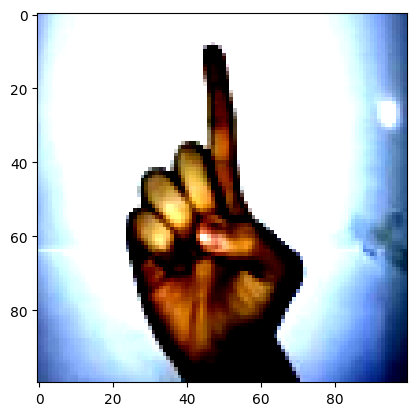

In [ ]:
index=7
pred=netC(torch.Tensor(X_test[index].reshape(1,3,100,100)))[0]
print("forecast result:",np.argmax(pred.detach().cpu().numpy()),"actual value:",y_test[index])
plt.imshow(X_test[index].transpose(1,2,0))

## Graphs

In [ ]:
train_losses = [i.item() for i in train_losses]
train_losses

[2.3114945888519287,
 2.020765542984009,
 1.9152247905731201,
 1.849393606185913,
 1.8122460842132568,
 1.760858416557312,
 1.7072373628616333,
 1.6743642091751099,
 1.6672234535217285,
 1.626654863357544,
 1.614010214805603,
 1.621601939201355,
 1.5749475955963135,
 1.5726546049118042,
 1.5650746822357178,
 1.5687912702560425,
 1.5429413318634033,
 1.538474678993225,
 1.5402148962020874,
 1.539840579032898]

In [ ]:
vali_losses = [i.item() for i in vali_losses]
vali_losses

[1.935852289199829,
 1.9274001121520996,
 1.8216166496276855,
 1.8163193464279175,
 1.7574888467788696,
 1.764886498451233,
 1.6914132833480835,
 1.686532735824585,
 1.650865077972412,
 1.6581465005874634,
 1.6291630268096924,
 1.6237515211105347,
 1.6108168363571167,
 1.6070811748504639,
 1.5881359577178955,
 1.5878002643585205,
 1.5888563394546509,
 1.5985615253448486,
 1.5730042457580566,
 1.5728113651275635]

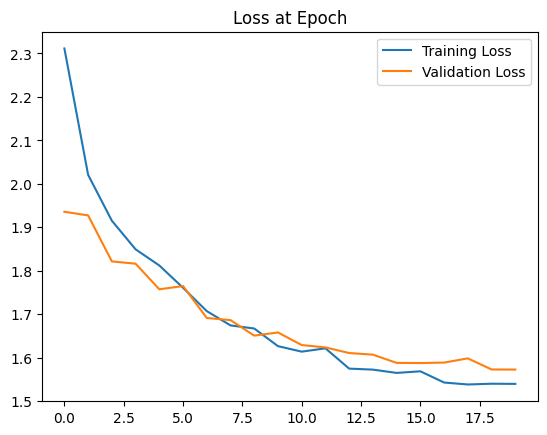

In [ ]:
plt.plot(train_losses, label="Training Loss")
plt.plot(vali_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

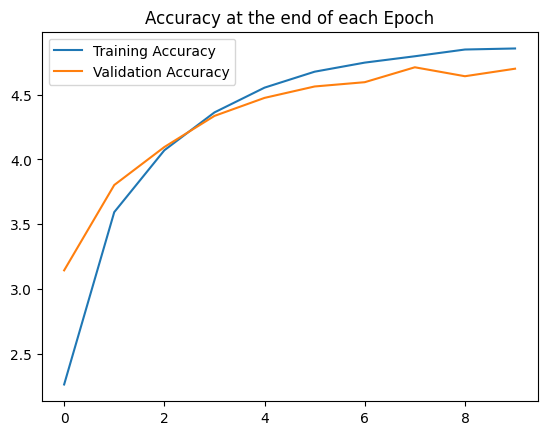

In [ ]:
plt.plot([t/1000 for t in train_correct], label="Training Accuracy")
plt.plot([t/1000 for t in vali_correct], label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch")
plt.legend()

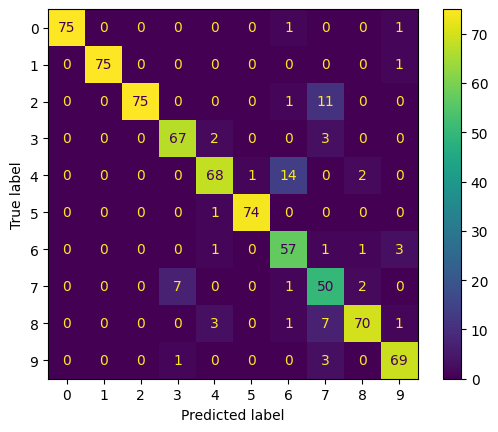

In [ ]:
conf_matr = confusion_matrix(pred_y, y_test)
cm_display = ConfusionMatrixDisplay(conf_matr).plot()

## Save model since it can take forever to train

In [ ]:
torch.save(netC,"sign_language.pth")